In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv ("admission.csv")
df=df.drop("Serial No.",axis=1)
df=df.rename(index=str, columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "Rating", "Chance of Admit ": "Admission_Chance"})
df.head()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admission_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isnull().any()

GRE                 False
TOEFL               False
Rating              False
SOP                 False
LOR                 False
CGPA                False
Research            False
Admission_Chance    False
dtype: bool

In [5]:
df.shape

(500, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GRE               500 non-null    int64  
 1   TOEFL             500 non-null    int64  
 2   Rating            500 non-null    int64  
 3   SOP               500 non-null    float64
 4   LOR               500 non-null    float64
 5   CGPA              500 non-null    float64
 6   Research          500 non-null    int64  
 7   Admission_Chance  500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 35.2+ KB


In [7]:
df.describe()

,GRE,TOEFL,Rating,SOP,LOR,CGPA,Research,Admission_Chance
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


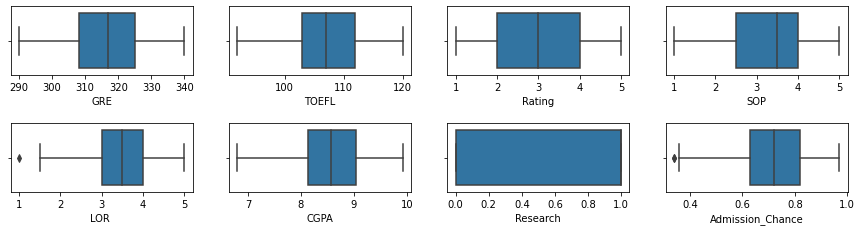

In [8]:
j = 0
fig = plt.subplots(figsize=(15, 12))
for i in df.columns:
    plt.subplot(6, 4, j+1)
    plt.subplots_adjust(wspace=0.2, hspace=0.7)
    j += 1
    sns.boxplot(x=df[i])
plt.show()

In [0]:
for i in df.columns:
    first_quartile = df[i].describe()['25%']
    third_quartile = df[i].describe()['75%']
    iqr = third_quartile - first_quartile
    df = df[(df[i] > (first_quartile - 3 * iqr)) & (df[i] < (third_quartile + 3 * iqr))]

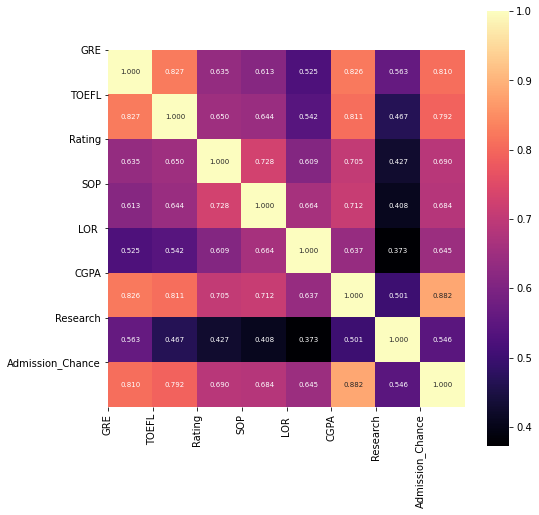

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
corrmat = df.corr()
sns.heatmap(corrmat, cmap='magma', annot=True, fmt=".3f", square= True, annot_kws={'size':7})
plt.xticks(range(len(corrmat.columns)), corrmat.columns)
plt.yticks(range(len(corrmat.columns)), corrmat.columns)
plt.show()

In [11]:
corr = df.corr()['Admission_Chance'].sort_values(ascending=False)
print(corr)

Admission_Chance    1.000000
CGPA                0.882413
GRE                 0.810351
TOEFL               0.792228
Rating              0.690132
SOP                 0.684137
LOR                 0.645365
Research            0.545871
Name: Admission_Chance, dtype: float64


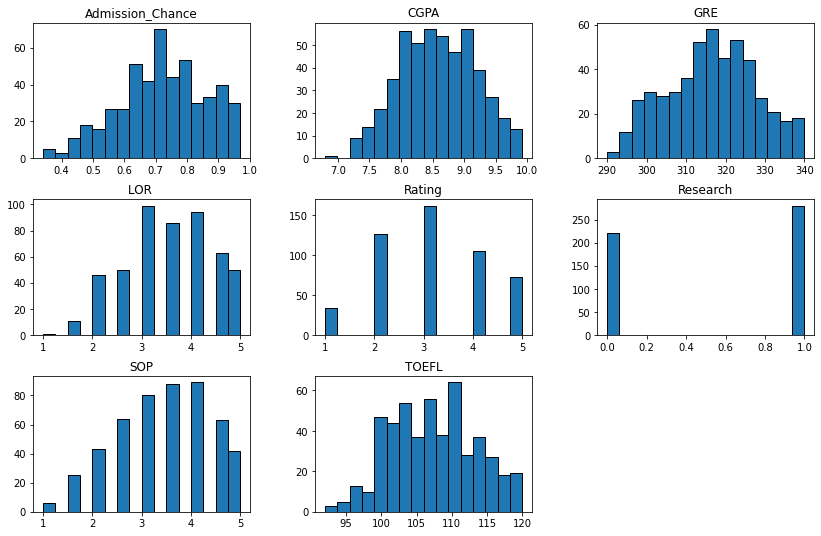

In [12]:
df.hist(figsize=(14, 9),bins=16,linewidth='1',edgecolor='k',grid=False)
plt.show()

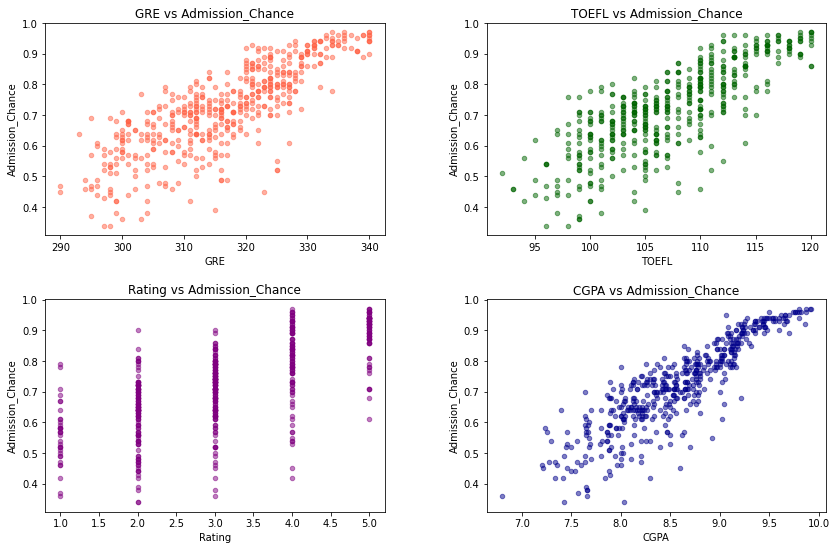

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14,9))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
df.plot(kind='scatter', x='GRE', y='Admission_Chance', alpha=0.5, color='tomato', ax=axes[0][0], title="GRE vs Admission_Chance")
df.plot(kind='scatter', x='TOEFL', y='Admission_Chance', alpha=0.5, color='darkgreen', ax=axes[0][1], title="TOEFL vs Admission_Chance")
df.plot(kind='scatter', x='Rating', y='Admission_Chance', alpha=0.5, color='purple', ax=axes[1][0], title="Rating vs Admission_Chance")
df.plot(kind='scatter', x='CGPA', y='Admission_Chance', alpha=0.5, color='darkblue', ax=axes[1][1], title="CGPA vs Admission_Chance")
plt.show()

In [0]:
X = np.asarray(df.drop(['Admission_Chance'],axis=1))
y = np.asarray(df['Admission_Chance'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [0]:
 model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])
model.compile(
              optimizer='adam',
              loss='mse')

In [19]:
kr = model.fit(X_train,y_train, epochs=50, batch_size=3, verbose=1)
y_pred_kr = model.predict(X_test)

Epoch 1/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0257
Epoch 2/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 3/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 4/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 5/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 6/50
134/134 [==============================] - 0s 985us/step - loss: 0.0046
Epoch 7/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 8/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 9/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 10/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 11/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 12/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0037
Epoch 13/50
134/134 [==

In [20]:
train_loss = model.evaluate(X_test, y_test)
print('Train loss:', train_loss)

4/4 [==============================] - 0s 2ms/step - loss: 0.0071
Train loss: 0.007125356234610081


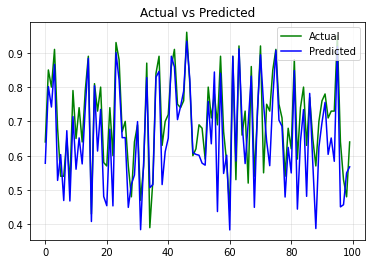

In [21]:
plt.plot(y_test, color = 'green', label = 'Actual')
plt.plot(y_pred_kr, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

No handles with labels found to put in legend.


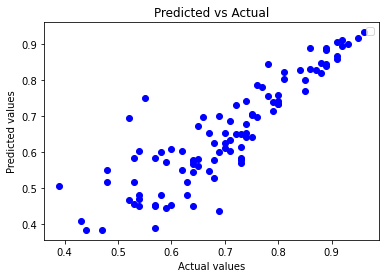

In [26]:
plt.scatter(y_test, y_pred_kr, color = 'blue')
plt.legend(loc = 'upper right') 
plt.title("Predicted vs Actual")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

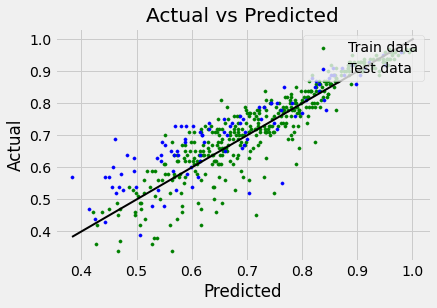

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_lr = reg.predict(X_test)

plt.style.use('fivethirtyeight') 
  
plt.scatter(reg.predict(X_train), y_train, color = "green", s = 10, label = 'Train data') 
plt.scatter(reg.predict(X_test), y_test, color = "blue", s = 10, label = 'Test data') 

## determine min and max values
xmin = min(
    min(reg.predict(X_train)),
    min(reg.predict(X_test ))
    )
xmax = max(
    max(reg.predict(X_train)),
    max(reg.predict(X_test ))
    )
ymin = min(
    min(y_train),
    min(y_test)
    )
ymax = max(
    max(y_train),
    max(y_test)
    )

## plotting diagonal line
xdiag = np.linspace(xmin,xmax)
ydiag = xdiag
plt.plot(xdiag, ydiag, color = "black", linewidth = 2)

## plotting legend 
plt.legend(loc = 'upper right') 
  
## plot title 
plt.title("Actual vs Predicted") 
plt.xlabel("Predicted")
plt.ylabel("Actual")
  
## function to show plot 
plt.show() 

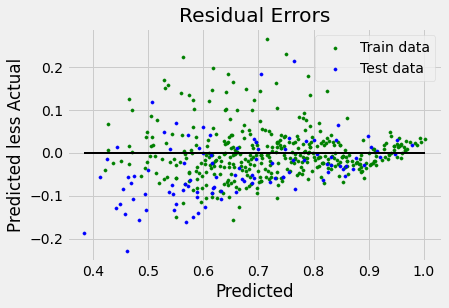

In [29]:
# plot for residual error 
plt.style.use('fivethirtyeight') 

## plotting residual errors in training data 
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train, color = "green", s = 10, label = 'Train data') 

## plotting residual errors in test data 
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test, color = "blue", s = 10, label = 'Test data') 

## determine min and max values
xmin = min(
    min(reg.predict(X_train)),
    min(reg.predict(X_test ))
    )
xmax = max(
    max(reg.predict(X_train)),
    max(reg.predict(X_test ))
    )
ymin = min(
    min(y_train),
    min(y_test)
    )
ymax = max(
    max(y_train),
    max(y_test)
    )

## plotting horizontal line
xline = np.linspace(xmin,xmax)
yline = np.linspace(0,0)
plt.plot(xline, yline, color = "black", linewidth = 2)

## plotting legend 
plt.legend(loc = 'upper right') 

## plot title 
plt.title("Residual Errors") 
plt.xlabel("Predicted")
plt.ylabel("Predicted less Actual")
  
## function to show plot 
plt.show() 

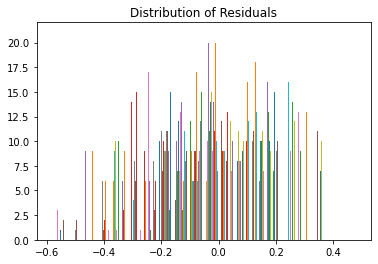

In [0]:
figsize = (6, 6)
residuals = y_pred_kr - y_test
plt.hist(residuals, bins = 20)
plt.title('Distribution of Residuals');

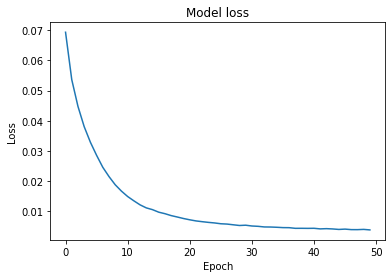

In [0]:
plt.plot(kr.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()